In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 14 day

In [ ]:
df = pd.read_csv("/content/PCA_14_day.csv")
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sentiment_Score,Label
0,0,11.954528,1.812412,-3.217449,13.963637,-3.361253,0.460499,12.137178,-2.494668,5.366800,-1.514809,0.191695,223.526962
1,1,10.709904,-0.214201,-5.700504,10.958427,-1.890313,-0.564533,6.652123,-1.910157,1.533036,-0.486445,0.084480,226.253723
2,2,11.838632,3.749143,-5.946665,9.062830,-4.112111,0.025731,7.117821,-0.250692,1.715919,1.649068,0.085170,226.808807
3,3,11.005023,-0.207807,-3.986200,10.637062,-0.529399,-0.988279,5.785585,-2.362321,0.569600,0.032533,0.154430,232.681091
4,4,10.654762,-1.130350,-4.018290,10.261911,-1.736565,-1.383619,5.279516,-2.118941,0.539035,-0.230833,0.115360,225.893417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,679,-8.452798,0.854263,-0.011718,-0.110013,-3.888464,0.120324,2.996900,2.720974,-0.953956,3.114194,-0.042575,318.713104
680,680,-8.255250,1.892167,-0.488274,0.717468,-2.148787,-1.491757,1.777934,1.422020,-0.984673,0.433160,0.197380,326.597137
681,681,-8.093714,2.886782,-1.072827,1.083558,-1.151988,-1.953895,1.740298,0.979670,-1.050405,0.449897,0.260790,329.151947
682,682,-7.446128,5.756862,-2.453420,0.202298,-2.166827,-1.442529,2.277192,1.124260,-1.386148,-0.426651,-0.048990,327.724854


In [ ]:
X = df.drop(df.columns[[0,-1]], axis=1)
X_train = X.iloc[:int(len(X)*0.8)]
X_test = X.iloc[int(len(X)*0.8):]

y = df[df.columns[-1]]
y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape the data to be 3D for LSTM input (assuming 11 features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=512, return_sequences=True))
model.add(LSTM(units=1024, return_sequences=True))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)


Epoch 1/20
35/35 [==============================] - 22s 253ms/step - loss: 0.1084 - val_loss: 0.1285
Epoch 2/20
35/35 [==============================] - 5s 147ms/step - loss: 0.0561 - val_loss: 0.1592
Epoch 3/20
35/35 [==============================] - 6s 165ms/step - loss: 0.0259 - val_loss: 0.0550
Epoch 4/20
35/35 [==============================] - 5s 147ms/step - loss: 0.0150 - val_loss: 0.0306
Epoch 5/20
35/35 [==============================] - 5s 146ms/step - loss: 0.0141 - val_loss: 0.0361
Epoch 6/20
35/35 [==============================] - 6s 180ms/step - loss: 0.0175 - val_loss: 0.0453
Epoch 7/20
35/35 [==============================] - 5s 144ms/step - loss: 0.0218 - val_loss: 0.0362
Epoch 8/20
35/35 [==============================] - 6s 171ms/step - loss: 0.0144 - val_loss: 0.0581
Epoch 9/20
35/35 [==============================] - 6s 158ms/step - loss: 0.0146 - val_loss: 0.0384
Epoch 10/20
35/35 [==============================] - 5s 153ms/step - loss: 0.0130 - val_loss: 0.030

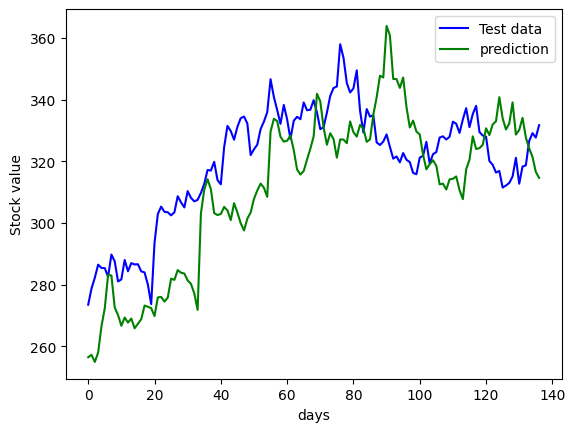

In [ ]:
plt.plot(scaler.inverse_transform(y_test), label='Test data', color='blue')
plt.plot(predictions, label='prediction', color='green')

# Adding labels and a legend
plt.xlabel('days')
plt.ylabel('Stock value')
plt.legend()

# Display the plot
plt.show()

# Next Day

In [ ]:
df = pd.read_csv("/content/PCA_next_day.csv")
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sentiment_Score,Label
0,0,11.809601,3.011069,-3.047492,14.100311,-3.643104,0.987312,12.019563,-3.034701,5.500081,-1.526753,0.191695,212.201126
1,1,10.768272,0.839386,-5.560204,11.114253,-2.042572,-0.272208,6.537874,-2.114879,1.554586,-0.396276,0.084480,206.698883
2,2,11.499168,4.886009,-5.848840,9.161709,-4.248493,0.249112,7.015573,-0.492638,1.874457,1.920690,0.085170,212.580917
3,3,11.046366,0.885392,-3.841793,10.800030,-0.669880,-0.690852,5.693514,-2.518345,0.534927,0.067242,0.154430,213.876144
4,4,10.795561,-0.068789,-3.881335,10.413639,-1.875727,-1.118131,5.190558,-2.275199,0.528501,-0.174562,0.115360,211.801849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,-6.123915,4.212783,2.532569,1.387634,0.264970,-2.213799,-0.272192,0.805537,0.210045,-0.496818,0.030005,326.597137
694,694,-6.406674,0.660509,4.872460,2.086772,2.079069,-1.535545,0.218317,0.820805,-0.316172,-0.440937,0.106390,329.151947
695,695,-6.667234,-0.494531,5.013517,1.582694,0.242300,-1.661608,0.096658,1.310003,0.129289,-0.588607,0.095580,327.724854
696,696,-6.798925,-0.817743,4.600643,1.033759,-1.210066,-1.584748,0.241370,1.666436,0.323675,-0.695224,-0.045235,331.746674


In [ ]:
X = df.drop(df.columns[[0,-1]], axis=1)
X_train = X.iloc[:int(len(X)*0.8)]
X_test = X.iloc[int(len(X)*0.8):]

y = df[df.columns[-1]]
y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape the data to be 3D for LSTM input (assuming 11 features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=512, return_sequences=True))
model.add(LSTM(units=1024, return_sequences=True))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)


Epoch 1/20
35/35 [==============================] - 20s 222ms/step - loss: 0.1105 - val_loss: 0.1514
Epoch 2/20
35/35 [==============================] - 6s 176ms/step - loss: 0.0473 - val_loss: 0.0663
Epoch 3/20
35/35 [==============================] - 5s 149ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 4/20
35/35 [==============================] - 5s 148ms/step - loss: 0.0039 - val_loss: 0.0174
Epoch 5/20
35/35 [==============================] - 6s 179ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 6/20
35/35 [==============================] - 5s 147ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 7/20
35/35 [==============================] - 6s 172ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 8/20
35/35 [==============================] - 7s 191ms/step - loss: 0.0020 - val_loss: 0.0042
Epoch 9/20
35/35 [==============================] - 6s 159ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/20
35/35 [==============================] - 6s 169ms/step - loss: 0.0019 - val_loss: 0.002

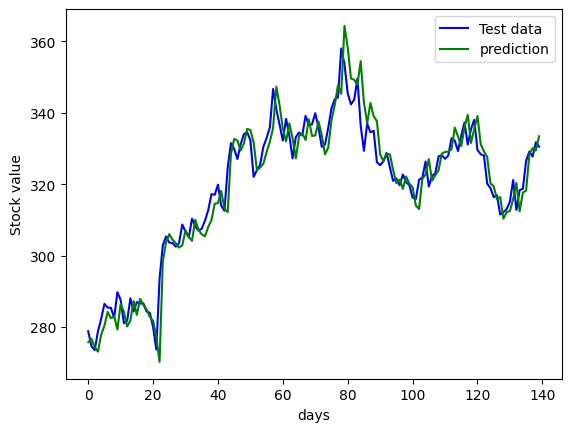

In [ ]:
plt.plot(scaler.inverse_transform(y_test), label='Test data', color='blue')
plt.plot(predictions, label='prediction', color='green')

# Adding labels and a legend
plt.xlabel('days')
plt.ylabel('Stock value')
plt.legend()

# Display the plot
plt.show()